In [277]:
import pandas as pd

In [235]:
import matplotlib.pyplot as plt
%matplotlib inline

In [283]:
df = pd.read_csv("USA_Housing.csv")

In [201]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [202]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [203]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [204]:
df.shape

(5000, 7)

In [205]:
df["Address"][:6]

0    208 Michael Ferry Apt. 674\nLaurabury, NE 3701...
1    188 Johnson Views Suite 079\nLake Kathleen, CA...
2    9127 Elizabeth Stravenue\nDanieltown, WI 06482...
3                            USS Barnett\nFPO AP 44820
4                           USNS Raymond\nFPO AE 09386
5    06039 Jennifer Islands Apt. 443\nTracyport, KS...
Name: Address, dtype: object

In [206]:
add_list = df["Address"]

In [207]:
len(add_list)

5000

In [208]:
import re

In [209]:
street_list = []
state_list = []
zip_list = []
city_state_list = []
city_list = []

# Street
for add in add_list:
    str = add
    stpos = str.find("\n")
    street_list.append(str[:stpos-1])
# City, State     
    x = re.findall('\n.*\s[A-Z][A-Z]\s',str)
    city_state_list.append(x[0])
    
    # Zip
    st_zip = str[stpos+1:]
    st_zip.rstrip()
    
    y = re.findall('[0-9].+',st_zip)
    if len(y)>0:
        zip_list.append(y[0]) 
    else:
        zip_list.append(' ')

for city_state in city_state_list:
    str1 = city_state
    city = str1[1:(len(str1)-4)].rstrip(',')
    city_list.append(city)
    state_list.append(str1[(len(str1)-3):(len(str1)-1)])
    


In [210]:
street_list[0:5]

['208 Michael Ferry Apt. 67',
 '188 Johnson Views Suite 07',
 '9127 Elizabeth Stravenu',
 'USS Barnet',
 'USNS Raymon']

In [211]:
city_list[0:5]

['Laurabury', 'Lake Kathleen', 'Danieltown', 'FPO', 'FPO']

In [212]:
state_list[0:5]

['NE', 'CA', 'WI', 'AP', 'AE']

In [213]:
zip_list[0:5]

['37010-5101', '48958', '06482-3489', '44820', '09386']

In [214]:
df['Street'] = street_list

In [215]:
df['city'] = city_list

In [216]:
df['state'] = state_list

In [217]:
df['zip'] = zip_list

In [218]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,Street,city,state,zip
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",208 Michael Ferry Apt. 67,Laurabury,NE,37010-5101
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",188 Johnson Views Suite 07,Lake Kathleen,CA,48958
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",9127 Elizabeth Stravenu,Danieltown,WI,06482-3489
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,USS Barnet,FPO,AP,44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,USNS Raymon,FPO,AE,09386


In [219]:
df = df.drop("Address",axis=1)
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Street,city,state,zip
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,208 Michael Ferry Apt. 67,Laurabury,NE,37010-5101
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,188 Johnson Views Suite 07,Lake Kathleen,CA,48958
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,9127 Elizabeth Stravenu,Danieltown,WI,06482-3489
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnet,FPO,AP,44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymon,FPO,AE,09386


In [220]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [221]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Street,city,state,zip
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,208 Michael Ferry Apt. 67,Laurabury,NE,37010-5101
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,188 Johnson Views Suite 07,Lake Kathleen,CA,48958
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,9127 Elizabeth Stravenu,Danieltown,WI,06482-3489
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnet,FPO,AP,44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymon,FPO,AE,09386


In [222]:
df.shape

(5000, 10)

In [223]:
df = df.rename(columns={'Avg. Area Income': 'Avg_income','Avg. Area House Age':'Avg_House_Age','Avg. Area Number of Rooms':'Avg_Number_of_Rooms','Avg. Area Number of Bedrooms':'Avg_number_of_Bedrooms','Area Population':'Population'})
df.head()

,Avg_income,Avg_House_Age,Avg_Number_of_Rooms,Avg_number_of_Bedrooms,Population,Price,Street,city,state,zip
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,208 Michael Ferry Apt. 67,Laurabury,NE,37010-5101
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,188 Johnson Views Suite 07,Lake Kathleen,CA,48958
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,9127 Elizabeth Stravenu,Danieltown,WI,06482-3489
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnet,FPO,AP,44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymon,FPO,AE,09386


In [226]:
df1 = pd.DataFrame(df,columns=['Avg_income','Avg_House_Age','Avg_Number_of_Rooms', 'Avg_number_of_Bedrooms','Population','Price' ],dtype=float)
print(df1.head())

     Avg_income  Avg_House_Age  Avg_Number_of_Rooms  Avg_number_of_Bedrooms  \
0  79545.458574       5.682861             7.009188                    4.09   
1  79248.642455       6.002900             6.730821                    3.09   
2  61287.067179       5.865890             8.512727                    5.13   
3  63345.240046       7.188236             5.586729                    3.26   
4  59982.197226       5.040555             7.839388                    4.23   

     Population         Price  
0  23086.800503  1.059034e+06  
1  40173.072174  1.505891e+06  
2  36882.159400  1.058988e+06  
3  34310.242831  1.260617e+06  
4  26354.109472  6.309435e+05  


In [227]:
df1.dtypes

Avg_income                float64
Avg_House_Age             float64
Avg_Number_of_Rooms       float64
Avg_number_of_Bedrooms    float64
Population                float64
Price                     float64
dtype: object

In [232]:
# Normalizing dfpr
from sklearn import preprocessing
float_array = df1.values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
df_normalized = pd.DataFrame(scaled_array,columns = ["Avg_income","Avg_House_Age","Avg_Number_of_Rooms","Avg_number_of_Bedrooms","Population","Price"])
print("Dataframe shape: ",df_normalized.shape,"\n") # 5000 rows, 10 columns + header

Dataframe shape:  (5000, 6) 



In [233]:
print(df_normalized[0:5])

   Avg_income  Avg_House_Age  Avg_Number_of_Rooms  Avg_number_of_Bedrooms  \
0    0.686822       0.441986             0.501502                0.464444   
1    0.683521       0.488538             0.464501                0.242222   
2    0.483737       0.468609             0.701350                0.695556   
3    0.506630       0.660956             0.312430                0.280000   
4    0.469223       0.348556             0.611851                0.495556   

   Population     Price  
0    0.329942  0.425210  
1    0.575968  0.607369  
2    0.528582  0.425192  
3    0.491549  0.507384  
4    0.376988  0.250702  


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021C20750940>,
      dtype=object)

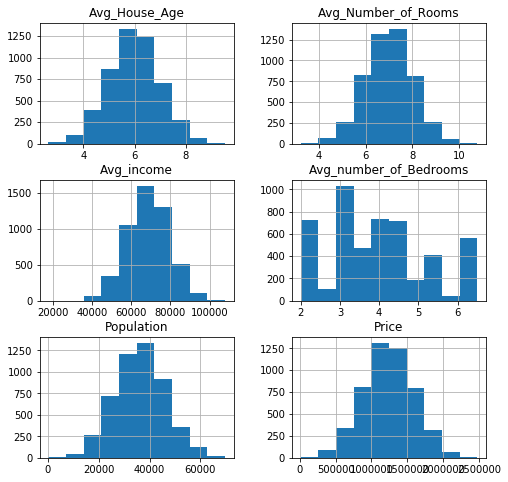

In [236]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df1.hist(ax = ax)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021C20CF29B0>,
      dtype=object)

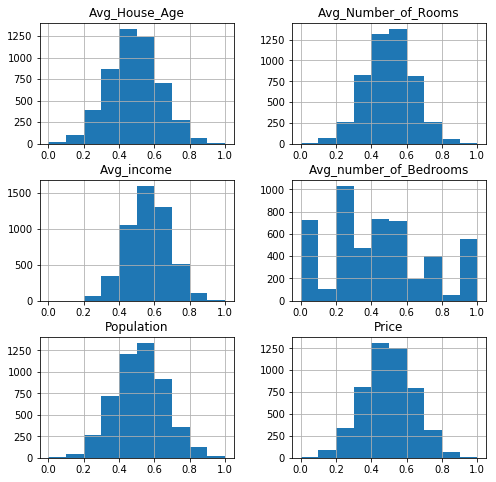

In [237]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df_normalized.hist(ax = ax)

In [243]:
def correlation_matrix(df1):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
          
    labels = ["Avg_income","Avg_House_Age","Avg_Number_of_Rooms","Avg_number_of_Bedrooms","Population","Price"]
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

In [246]:
df1.corr()

,Avg_income,Avg_House_Age,Avg_Number_of_Rooms,Avg_number_of_Bedrooms,Population,Price
Avg_income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg_House_Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg_Number_of_Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg_number_of_Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


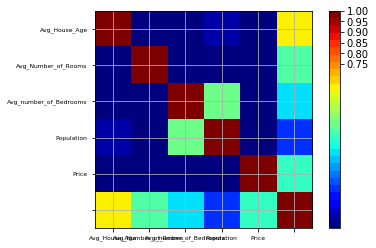

In [247]:
correlation_matrix(df1)

In [248]:
df_normalized.corr()

,Avg_income,Avg_House_Age,Avg_Number_of_Rooms,Avg_number_of_Bedrooms,Population,Price
Avg_income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg_House_Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg_Number_of_Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg_number_of_Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


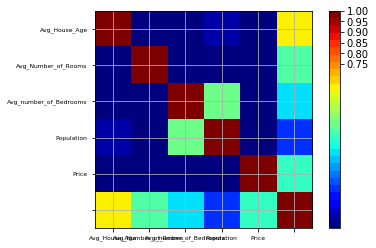

In [249]:
correlation_matrix(df_normalized) # normalized data

In [250]:
X = df_normalized.drop('Price',axis=1)
y = df_normalized['Price']

In [251]:
# Split data to training and test
from sklearn.model_selection import train_test_split
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print("X_train shape: ",X_train.shape) # 3750 rows, 5 columns
print("y_train shape: ",y_train.shape) # 3750 rows, 1 column
print("X_test shape: ",X_test.shape) # 1250 rows, 5 columns
print("y_test shape: ",y_test.shape) # 1250 rows, 1 column
# print(y_train)

X_train shape:  (3750, 5)
y_train shape:  (3750,)
X_test shape:  (1250, 5)
y_test shape:  (1250,)


In [252]:
# Training models in Python dictionary
import math
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge

# Next line is "dictionary" data structure from class 1
d_models = {"Linear_Regression": LinearRegression(),
            "Ridge": Ridge(alpha=0.5),
            "Lasso": Lasso(alpha=0.1),
            "LassoLars": LassoLars(alpha=0.1),
            "BayesianRidge": BayesianRidge()}
models_list = d_models.keys()
print(models_list)

dict_keys(['Linear_Regression', 'Ridge', 'Lasso', 'LassoLars', 'BayesianRidge'])


In [253]:
for regression_model in models_list:
    regressor = d_models[regression_model]
    regressor.fit(X_train,y_train)
    y_predict = regressor.predict(X_test)
    regression_model_mse = mean_squared_error(y_predict, y_test)
    print(regression_model," ",math.sqrt(regression_model_mse))

Linear_Regression   0.041997916062775996
Ridge   0.04202402858703501
Lasso   0.14834529544043218
LassoLars   0.14834529544043218
BayesianRidge   0.04199804725966204


In [254]:
# Training model
from sklearn.linear_model import BayesianRidge
lm = BayesianRidge()
lm.fit(X_train, y_train)
print(lm.intercept_)
print(lm.coef_)
print ("Number of coefficients is ",len(lm.coef_))

-0.5838432136725896
[0.79197973 0.46291794 0.36862926 0.00436796 0.42879494]
Number of coefficients is  5


In [255]:
import math
from sklearn.metrics import mean_squared_error
y_predict = lm.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
print(math.sqrt(regression_model_mse))

0.04199804725966204


In [263]:
first_test = np.array([[100000.00,5,5,2,20000.00,100000.00]])
print("Starting predict request:",first_test)

Starting predict request: [[1.e+05 5.e+00 5.e+00 2.e+00 2.e+04 1.e+05]]


In [266]:
first_test_transform = min_max_scaler.transform(first_test) # apply the same transform
print("Normalized new test row :",first_test_transform)

Normalized new test row : [[0.91433471 0.34265744 0.23444285 0.         0.28549526 0.03426702]]


In [273]:
test_1 = list(first_test_transform[0][0:5]) # Extract all values excluding Price
test_seq = [test_1] # make a list of list
test_seq

[[0.9143347050921913,
  0.34265743549880023,
  0.2344428463147742,
  0.0,
  0.28549525545056204]]

In [274]:
test_result = lm.predict(test_seq) # apply model prediction
print("Test result Price (still normalized): ",test_result[0]) # this is still normalized Price result

Test result Price (still normalized):  0.5077550235528835


In [275]:
first_test_transform[0][0] = test_result[0] # put result back, replace dummy with predicted
print("Test row with predicted (still normalized): ",first_test_transform)

Test row with predicted (still normalized):  [[0.50775502 0.34265744 0.23444285 0.         0.28549526 0.03426702]]


In [276]:
result = min_max_scaler.inverse_transform(first_test_transform) # apply inverse transform
print("Final test result: ",result)
print("Predicted Price: ",result[0][0])

Final test result:  [[6.34464061e+04 5.00000000e+00 5.00000000e+00 2.00000000e+00
  2.00000000e+04 1.00000000e+05]]
Predicted Price:  63446.40608490982
